In [1]:
import os

In [2]:
os.chdir("/homes/kek/ODE_for_Neural_Optimal_Transport")

In [3]:
from pathlib import Path
from torch.utils.data import DataLoader, Dataset
from datasets.dataset import CelebDataset
import torchvision
import numpy as np
from models.models import ODEBlock, SimpleFunc
import torch

2023-07-21 13:10:47.001392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 13:10:48.479103: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-21 13:10:48.479210: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-07-21 13:10:48.479223: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [ ]:
import pytorch_lightning as pl


from models.models import NeuralTransfer, ODEBlock, SimpleFunc
from datasets.dataset import CelebDataModule

model = NeuralTransfer(ODEBlock, SimpleFunc)
dm = CelebDataModule("/homes/kek/ODE_for_Neural_Optimal_Transport/datasets/Dataset", batch_size = 8)
tb_logger = pl.loggers.TensorBoardLogger(save_dir="logs/")

trainer = pl.Trainer(
    accelerator="gpu",
    devices=1,
    max_epochs=200,
    logger=tb_logger,
    limit_train_batches=100
)

trainer.fit(model, dm)

/homes/kek/miniconda3/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /homes/kek/miniconda3/lib/python3.10/site-packages/i ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/homes/kek/miniconda3/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /homes/kek/miniconda3/lib/python3.10/site-packages/i ...
  rank_zero_warn(
You are using a CUDA device ('NVIDIA RTX A4000') that has Tensor Cores. To properly utilize 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

/homes/kek/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:212: UserWarning: You called `self.log('num_solver_step', ...)` in your `on_train_batch_end` but the value needs to be floating point. Converting it to torch.float32.
  warning_cache.warn(


Validation: 0it [00:00, ?it/s]

In [5]:
model = NeuralTransfer(ODEBlock, SimpleFunc).load_from_checkpoint("/homes/kek/ODE_for_Neural_Optimal_Transport/logs/lightning_logs/version_6/checkpoints/epoch=1-step=200.ckpt")

# disable randomness, dropout, etc...
model.eval()


NeuralTransfer(
  (transfer): ODEBlock(
    (ode_func): ODEModel(
      (nn): Sequential(
        (0): Conv2d(3, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): FPN(
          (bridge): ConsistentSequential(
            (0): ResBlock(
              (conv_path): Sequential(
                (0): PreActivationND(
                  (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                  (layer): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                )
                (1): PreActivationND(
                  (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                  (layer): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                )
              )
              (adjust_to_stride): Conv2d(256, 512, kernel_size=(1, 1), strid

In [10]:
from PIL import Image
from datasets.dataset import CelebDataset
import torchvision.transforms as T


In [8]:
img = Image.open("/homes/kek/ODE_for_Neural_Optimal_Transport/datasets/Dataset/Validation/Male/180002.jpg")

In [11]:
d = CelebDataset("/homes/kek/ODE_for_Neural_Optimal_Transport/datasets/Dataset", transform=T.Compose([T.Resize((224, 224)), T.ToTensor()]))

In [14]:
d[0][0].size()

torch.Size([3, 224, 224])

In [15]:
res = model(d[0][0][None, ...])

In [17]:
res.size()

torch.Size([1, 3, 224, 224])

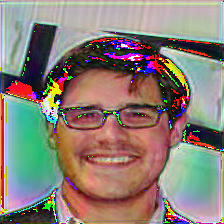

In [18]:
from torchvision.transforms import functional as F

F.to_pil_image(res[0])

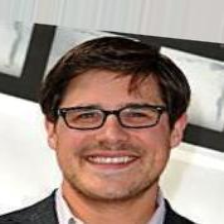

In [19]:
F.to_pil_image(d[0][0])

In [1]:
! gpustat

hub                  Thu Jul 20 11:28:36 2023  525.60.13
[0] NVIDIA RTX A4000 | 34'C,   0 % |  3428 / 16376 MB | mgoncharov(948M) abazarova(580M) leonmeon(1616M) gdm(8M) gdm(3M)
[1] NVIDIA RTX A4000 | 31'C,   0 % |  7421 / 16376 MB | leonmeon(7146M) gdm(4M)


In [29]:
res = (torch.from_numpy(np.array(Image.open(
    "/homes/kek/ODE_for_Neural_Optimal_Transport/datasets/Dataset/Train/Male/000003.jpg"
))).permute(2,0,1)[None, :, :, :]).type(torch.float32)

In [35]:
a(res).size()

torch.Size([1, 160, 218, 178])

In [32]:
nn.Conv2d(3, 80, 3, padding=1)(res).size()

torch.Size([1, 80, 218, 178])

In [4]:
model = SimpleFunc()

In [4]:
a = get_dataloader("/homes/kek/ODE_for_Neural_Optimal_Transport/datasets/Dataset/Train")

In [5]:
res = next(iter(a))

In [6]:
model = ODEBlock()

In [ ]:
res1 = model(res)

In [9]:
res1.size()

torch.Size([64, 3, 224, 224])

In [15]:
d = CelebDataset("/homes/kek/ODE_for_Neural_Optimal_Transport/datasets/Dataset/Train", transform=torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)), torchvision.transforms.ToTensor()]))

In [17]:
a = DataLoader(d, 2, shuffle = True)

In [19]:
next(iter(a)).size()

torch.Size([2, 3, 224, 224])

In [17]:
from torchvision.models import resnet50, ResNet50_Weights
from torch import nn

In [18]:
p = nn.Sequential(*[i for i in list(resnet50().children())[:-1]])

In [20]:
i = p(res1)

In [23]:
i.squeeze().size()

torch.Size([64, 2048])

In [24]:
o = nn.ModuleList([])

In [ ]:
o.ex